In [35]:
import numpy as np
import math
from scipy import stats
from scipy.stats import norm
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

import warnings
warnings.filterwarnings('ignore')

## 8.1 SciPy를 이용한 확률분포 분석

사이파이에서 확률분포 기능을 사용하려면 우선 해당 확률분포에 대한 확률분포 클래스 객체를 생성한 후에 이 객체의 메서드를 호출해야 한다.

확률분포 객체를 생성하는 명령에는 다음과 같은 것들이 있다. 

 
| 종류 | 명령 | 확률분포 |
|-|-|-|
| 이산 | `bernoulli` | 베르누이분포 |
| 이산 | `binom` |  이항분포 |
| 이산 | `multinomial` |  다항분포 |
| 연속 | `uniform` | 균일분포 |
| 연속 | `norm` | 정규분포 |
| 연속 | `beta` | 베타분포 |
| 연속 | `gamma` | 감마분포 |
| 연속 | `t` | 스튜던트 t분포 |
| 연속 | `chi2` | 카이 제곱분포 |
| 연속 | `f` | F분포 |
| 연속 | `dirichlet` | 디리클리분포 |
| 연속 | `multivariate_normal` | 다변수 정규분포 |


이 명령들은 모두 stats 서브패키지에 포함되어 있다. 예를 들어 정규분포 객체는 다음과 같이 생성한다.

In [2]:
rv = stats.norm(loc=1, scale=2)

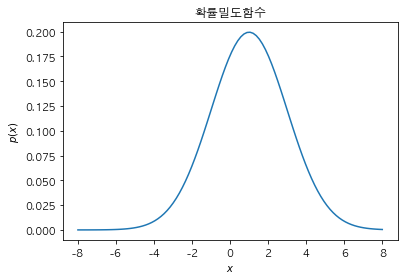

In [3]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

## 8.2 베르누이분포와 이항분포

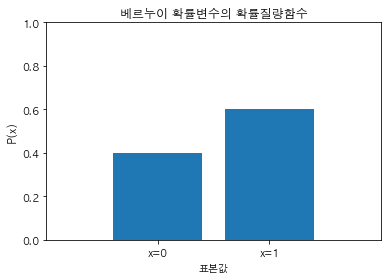

In [6]:
mu = 0.6  # 성공확률
rv = stats.bernoulli(mu)

xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

### 베르누이분포의 모멘트
- 기댓값: $E[X] = \mu$
- 증명:
$$
\begin{align}
\begin{aligned}
\text{E}[X] 
&= \sum_{x_i \in \Omega} x_i p(x_i) \\
&= 1 \cdot \mu + 0 \cdot (1 - \mu) \\
&= \mu
\end{aligned}
\end{align}
$$

- 분산: $\text{Var}[X] = \mu(1-\mu)$
- 증명:
$$
\begin{align}
\begin{aligned}
\text{Var}[X] 
&= \sum_{x_i \in \Omega} (x_i - \mu)^2 p(x_i) \\
&= (1 - \mu)^2 \cdot \mu + (0 - \mu)^2 \cdot (1 - \mu) \\
&= \mu(1-\mu)
\end{aligned}
\end{align}
$$

### 이항분포

- 성공확률이 $\mu$인 베르누이 시행을 $N$ 번 반복하고 $N$번 중 성공한 횟수를 확률변수 $X$라고 했을 때 $X$의 확률분포
    - "$X$는 이항분포를 따르는 확률변수다"
    - $X \sim \text{Bin}(x; N, \mu)$

In [7]:
N = 10
mu = 0.6
rv = stats.binom(N, mu)

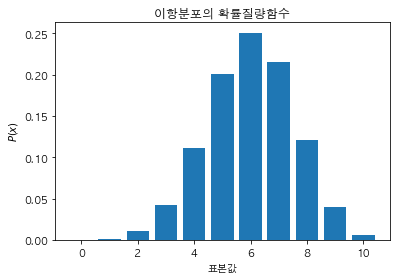

In [8]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('이항분포의 확률질량함수')
plt.show()

#### 이항분포의 모멘트
이항분포의 기댓값과 분산은 각각 다음과 같다.

* 기댓값

$$
\begin{align}
\text{E}[X] = N\mu
\tag{8.2.17}
\end{align}
$$

(증명)

$$
\begin{align}
\text{E}[X] = \text{E} \left[ \sum_{i=1}^N Y_i \right] = \sum_{i=1}^N  \text{E}[ Y_i ] = N\mu
\tag{8.2.18}
\end{align}
$$


여기에서 $Y_i$는 서로 독립인 베르누이분포이다.

* 분산

$$
\begin{align}
\text{Var}[X] = N\mu(1-\mu)
\tag{8.2.19}
\end{align}
$$

(증명)

$$
\begin{align}
\text{Var}[X] = \text{Var} \left[ \sum_{i=1}^N Y_i \right] = \sum_{i=1}^N  \text{Var}[ Y_i ] = N\mu(1-\mu)
\tag{8.2.20}
\end{align}
$$

### 베르누이분포와 이항분포의 모수추정(parameter estimation)
- 베르누이분포와 이항분포는 공통된 모수 $\mu$를 가진다.
    - 보통은 표본 데이터가 한 개보다 많기 때문에 대부분이 이항분포가 된다.
- 추정한 값 $\hat \mu$는 다음과 같이 계산한다:
    - $ \hat \mu = \dfrac {\sum^N_{i=1} x_i}{N} = \dfrac{N_1}{N} $
    - 위에서 $N$은 전체 데이터 수, $N_1$은 1이 나온 횟수다.

### QQ Plot

정규분포는 여러 연속확률분포 중에서도 가장 널리 사용되는 확률분포다. 따라서 어떤 확률변수의 분포가 정규분포인지 아닌지 확인하는 것은 중요한 통계적 분석 중 하나다. 

**Q-Q(Quantile-Quantile) 플롯**은 분석할 표본 데이터의 분포와 정규분포의 분포 형태를 비교하여 표본 데이터가 정규분포를 따르는지 검사하는 간단한 시각적 도구다. Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 데이터값을 한 쌍으로 만들어 그린 스캐터 플롯(scatter plot)이다. Q-Q 플롯을 그리는 방법은 다음과 같다(여기에서는 대략적인 방법론을 서술했으며 세부적인 사항은 다를 수 있다).

1. 표본 데이터를 정렬(sort, ordering)한다. 
2. 하나하나의 표본 데이터가 전체 데이터 중의 몇 % 정도에 해당하는지 위칫값을 구한다. 위칫값으로는 특정 순위(order)의 값이 나타날 가능성이 높은 값을 뜻하는 순서통계량(order statistics)이라는 값을 이용한다.
3. 각 표본 데이터의 위칫값이 정규분포의 누적확률함수(cdf) 값이 되는 표준 정규분포의 표본값을 구한다. 즉 확률값에 대한 누적확률함수의 역함수 값을 구한다. 이를 표본 정규분포의 분위함수(quantile function)값이라고 한다. 예를 들어 표본 정규분포의 1%의 분위함수값은 $F^{-1}(0.01)$, 약 -2.326이다.
4. 정렬된 표본 데이터(ordered values)와 그에 대응하는 분위수(theoretical quantiles)를 하나의 쌍으로 간주하여 2차원 공간에 하나의 점(point)으로 그린다.
5. 모든 표본에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯을 완성한다.

#### 예제

이번에는 스팸 메일 필터의 입력 데이터에서 베르누이분포를 활용하는 방법을 알아보자. 스팸 메일은 특정한 단어(키워드)를 가지고 있을 확률이 높다. 스팸 메일을 구분하기 위한 키워드가 여러 개라면 다음과 같이 BOW(Bag of Words) 인코딩된 벡터로 나타낼 수 있다. 이 예에서는 4개의 키워드 4개를 사용하였했다. 만약 어떤 메일이 첫 번째와 세 번째 키워드를 포함하고 있으며 두 번째와 네 번째 키워드는 포함하지 않으면 다음과 같은 특징 벡터로 표시할 수 있다.

$$
\begin{align}
x = \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix}
\tag{8.2.23}
\end{align}
$$

여러개의 메일이 있으면 다음처럼 특징 행렬로 표시한다. 특징 행렬에서는 행 벡터가 메일을, 열 벡터가 키워드를 나타낸다.

$$ 
\begin{align}
X_{\text{spam}} =
\begin{bmatrix} 
1 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 \\
1 & 1 & 0 & 1 \\
0 & 0 & 1 & 1 \\
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 \\
\end{bmatrix} 
\tag{8.2.24}
\end{align}
$$

이때, 스팸 메일의 특성은 4개의 베르누이 확률변수의 튜플 $(X_1, X_2, X_3, X_4)$로 나타낼 수 있다. 

* $X_1$: 메일이 첫 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$
\begin{align}
p(X_1=1 | Y=1) = \text{Bern}(x_1; \mu_{spam,1})
\tag{8.2.25}
\end{align}
$$

* $X_2$: 메일이 두 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$
\begin{align}
p(X_2=1 | Y=1) = \text{Bern}(x_2; \mu_{spam,2})
\tag{8.2.26}
\end{align}
$$

* $X_3$: 메일이 세 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$
\begin{align}
p(X_3=1 | Y=1) = \text{Bern}(x_3; \mu_{spam,3})
\tag{8.2.27}
\end{align}
$$

* $X_4$: 메일이 네 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$
\begin{align}
p(X_4=1 | Y=1) = \text{Bern}(x_4; \mu_{spam,4})
\tag{8.2.28}
\end{align}
$$


특징 행렬의 각 열로부터 각 베르누이 확률분포의 모수의 추정값을 구하면  다음과 같다.

$$
\begin{align}
\hat\mu_{spam,1} = \dfrac{5}{6},\;\; \hat\mu_{spam,2} = \dfrac{4}{6},\;\; \hat\mu_{spam,3} = \dfrac{3}{6},\;\; \hat\mu_{spam,4} = \dfrac{3}{6}
\tag{8.2.29}
\end{align}
$$


In [18]:
# 시뮬레이션으로 랜덤 표본을 얻는다.
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

## 8.4 정규분포와 중심극한정리

**정규분포(normal distribution)** 혹은 가우스 정규분포(Gaussian normal distribution)라는 분포는 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화할 때 많이 사용한다.

정규분포는 평균 $\mu$와 분산 $\sigma^2$이라는 두 모수만으로 정의되며 확률밀도함수(pdf: probability density function)는 다음과 같은 수식으로 표현된다.

$$
\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\tag{8.4.1}
\end{align}
$$

분산의 역수를 정밀도(precision) $\beta$라고 부르기도 한다.

$$
\begin{align}
\beta = \dfrac{1}{\sigma^2}
\tag{8.4.2}
\end{align}
$$

정규분포 중에서도 평균이 0이고 분산이 1인 ($\mu=0$, $\sigma^2=1$) 정규분포를 **표준정규분포(standard normal distribution)**라고 한다.

정규분포의 확률밀도함수는 다음과 같은 성질을 가진다.

* $x=\mu$일 때 확률밀도가 최대가 된다.
* $x=\infty$로 다가가거나 $x=-\infty$로 다가갈수록 확률밀도가 작아진다.

In [19]:
x_sorted = np.sort(x)
x_sorted

array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
        0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
        0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
        1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ])

In [12]:
mu = 0
std = 1
rv = stats.norm(mu, std)

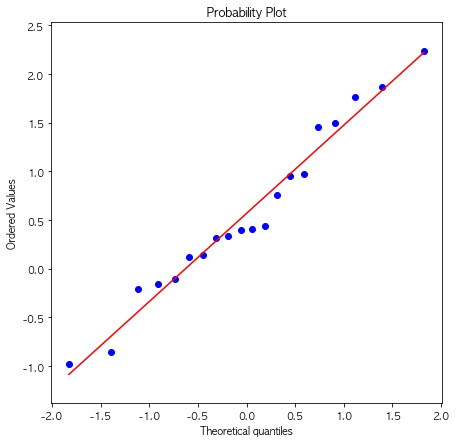

In [21]:
plt.figure(figsize=(7, 7))
stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

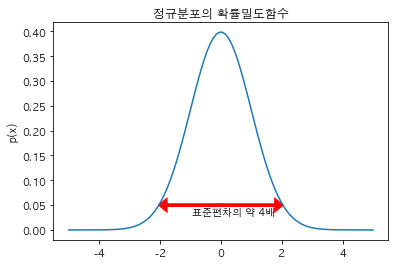

In [13]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.arrow(0, 0.05, 2, 0, lw=3, color='r', 
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r', 
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.text(-0.95, 0.03, "표준편차의 약 4배")
plt.ylabel("p(x)")
plt.title("정규분포의 확률밀도함수")
plt.show()

### 정규분포의 통계량 분포

임의의 분포가 아닌 복수의 정규분포로부터 얻은 표본 데이터로 구한 표본평균은 어떤 분포를 가지게 될까?

> **$N$개의 정규분포로부터 얻은 표본의 합은 $N$과 상관없이 기댓값이 $N\mu$, 분산이 $N\sigma^2$인 정규분포다.**

$$
\begin{align}
x_i \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\; \sum_{i=1}^N x_i \sim \mathcal{N}(N\mu, N\sigma^2)
\tag{8.4.6}
\end{align}
$$

정규분포의 표본에 상수를 빼거나 곱해도 정규분포다. 이 경우에도 위와 같이 기댓값이 0, 표준편차가 1이 되도록 정규화를 하면 다음과 같이 쓸 수 있다.

$$
\begin{align}
x_i \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\;  z = \dfrac{\bar{x} - \mu}{\dfrac{\sigma}{\sqrt{N}}} \sim \mathcal{N}(x;0,1)
\tag{8.4.7}
\end{align}
$$

정규분포 표본의 평균을 정규화한 통계량을 $z$ 통계량이라고 한다. 중심극한정리와 다른 점에 주의해야 한다. **중심극한정리에서는 표준정규분포로 점점 다가갈 뿐이고 표본 개수가 무한대가 되기 전에는 정확한 정규분포가 아니지만 $z$ 통계량은 개수 $N$에 상관없이 항상 정확하게 표준정규분포**이다.

## 8.5 t분포, 카이제곱분포, F분포
- 모두 정규분포에서 파생된 분포이다.
    - 정규분포에서 생성된 표본 데이터 집합에 여러 수식을 적용하여 값을 변화시키면 데이터 집합의 분포 모양이 달라지는데, 적용된 수식에 따라 t분포/카이제곱분포/F분포가 된다.
    - 이 분포들은 '통계량 분포'라고도 불린다. => 나중에 가설 검정에 쓰인다.

t분포는 양 끝단이 더 두텁다 => 정규분포라 가정했을 때보다 극단적인 현상이 더 자주 발생한다. "Fat Tail 현상"

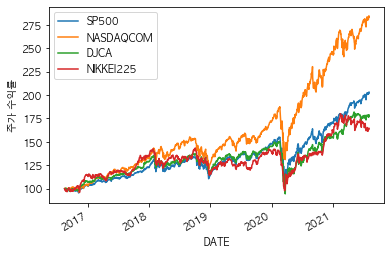

In [22]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

plt.ylabel("날짜")
plt.ylabel("주가 수익률")
plt.show()

데이터에서 각 지수간 일간 수익률을 구해서 히스토그램 만들면 정규분포와 비슷하다

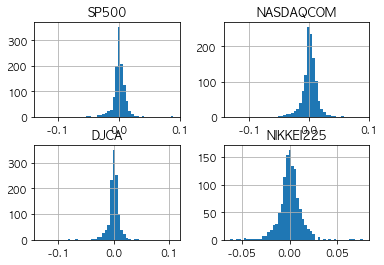

In [23]:
import numpy as np
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

하지만 qq plot을 보면 정규분포보다 극단적인 경우가 많은 것을 알 수 있다.

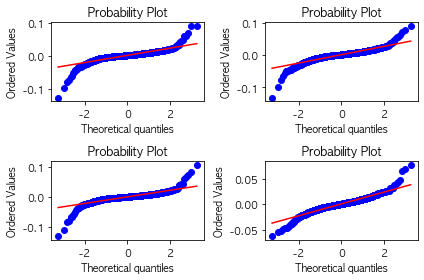

In [24]:
import scipy as sp
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

위와 같은 데이터 모형에 적합한 것이 t분포다.


이렇게 팻 테일을 보이는 데이터 모형에 적합한 것이 **스튜던트 t분포(student-t distribution)** 혹은 **t분포**라고 부르는 분포다. 스튜던트 t분포의 확률 밀도 함수는 다음 수식에 의해 정의된다. 

$$
\begin{align}
t(x;\mu, \lambda, \nu) = \frac{\sqrt{\lambda}}{\sqrt{\nu\pi}}\frac{\Gamma\left(\frac{\nu+1}{2}\right)} {\Gamma\left(\frac{\nu}{2}\right)} \left(1+\lambda\frac{(x-\mu)^2}{\nu} \right)^{-\frac{\nu+1}{2}}
\tag{8.5.1}
\end{align}
$$


이 식에서 $\lambda$는 정규분포의 정밀도 $(\sigma^2)^{-1}$에 대응하는 개념이고 $\Gamma(x)$는 감마(Gamma) 함수라는 특수 함수다.

$$
\begin{align}
\Gamma(x) = \int_0^\infty  u^{x-1} e^{-u} du
\tag{8.5.2}
\end{align}
$$

정규분포와 달리 정수값을 가지는 **자유도(degree of freedom)**라는 모수(parameter) $\nu$를 추가적으로 가진다. 스튜던트 t분포에서는 모수 $\nu$로 2 이상의 자연수를 사용한다. 모수 $\nu$가 1인 경우는 **코시분포(Cauchy distribution)**라고 한다. 코시분포에서 양수인 부분만 사용하는 경우에는 **하프코시분포(Half-Cauchy distribution)**라고 부른다.

스튜던트 t분포의 확률 밀도 함수를 그리려면 사이파이 패키지의 `t` 클래스를 사용한다. 이때 인수 `df`는 자유도, `loc`는 기댓값, `scale`은 표준편차를 설정한다. 다음 그림에서 자유도 $\nu$가 작으면 정규분포보다 분산이 크고 팻 테일을 보이지만  자유도가 증가할수록 정규분포로 수렴하는 것을 볼 수 있다.

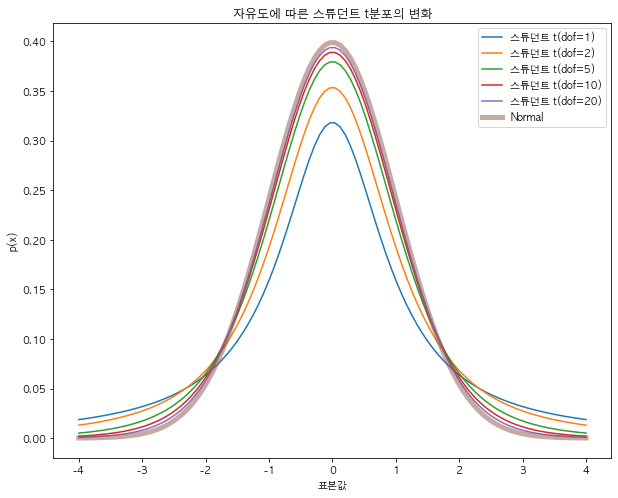

In [31]:
plt.subplots(figsize=(10,8))
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("스튜던트 t(dof=%d)" % df))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 스튜던트 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

### t 통계량
정규분포의 표본을 표준편차로 나눠 정규화한 $z$ 통계량은 항상 정규분포가 된다는 것은 이미 공부하였다. 그런데 $z$ 통계량을 구하려면 확률분포의 정확한 표준편차를 우리가 알고 있어야 한다. 하지만 현실적으로는 표준편차를 정확히 알 수 없기 때문에 표본에서 측정한 표본표준편차(sample standard deviation)로 정규화할 수밖에 없다. 정규분포로부터 얻은 $N$개의 표본 $x_1, \cdots, x_N$에서 계산한 **표본평균을 표본표준편차로 정규화한 값을 $t$ 통계량**이라고 한다.

**$t$ 통계량은 자유도가 $N-1$인 스튜던트 t분포**를 이룬다. 

$$
\begin{align}
t = \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{N}}} \sim t \, (x; 0, 1, N - 1)
\tag{8.5.5}
\end{align}
$$

이 식에서 $ \bar{x}, s$은 각각 표본평균, 표본표준편차다.

$$
\begin{align}
\bar{x} = \frac{x_1+\cdots+x_N}{N}
\tag{8.5.6}
\end{align}
$$

$$
\begin{align}
s^2 = \frac{1}{N-1}\sum_{i=1}^N (x_i - \bar{x})^2
\tag{8.5.7}
\end{align}
$$

이 정리는 추후 정규분포의 기댓값에 관한 각종 검정에서 사용된다.

다음은 시뮬레이션을 사용하여 표본표준편차로 정규화한 표본평균과 정규분포를 비교한 것이다. 왼쪽은 $N=4$, 오른쪽은 $N=40$인 경우다.

### 카이제곱분포
정규분포를 따르는 확률 변수 $X$ 의 $N$개의 표본 $x_1, \cdots, x_N$의 합(또는 평균)은 표본 분산으로 정규화하면 스튜던트 t분포를 따른다는 것을 배웠다. 

그런데 이 $N$개의 표본들을 단순히 더하는 것이 아니라 제곱을 하여 더하면 양수값만을 가지는 분포가 된다. 이 분포를 **카이제곱(chi-squared)분포**라고 하며 $\chi^2(x;\nu)$으로 표기한다. 카이제곱분포도 스튜던트 t분포처럼 자유도 모수를 가진다.

$$
\begin{align}
x_i \sim \mathcal{N}(x)
\tag{8.5.8}
\end{align}
$$
$$
\begin{align}
\downarrow
\tag{8.5.9}
\end{align}
$$
$$
\begin{align}
\sum_{i=1}^N x_i^2 \sim \chi^2(x;\nu=N)
\tag{8.5.10}
\end{align}
$$


카이제곱분포의 확률 밀도 함수는 다음과 같다.

$$
\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\tag{8.5.11}
\end{align}
$$

사이파이 stats 서브패키지의 `chi2` 클래스를 사용하여 확률 밀도 함수의 모양을 살펴보면 다음과 같다.

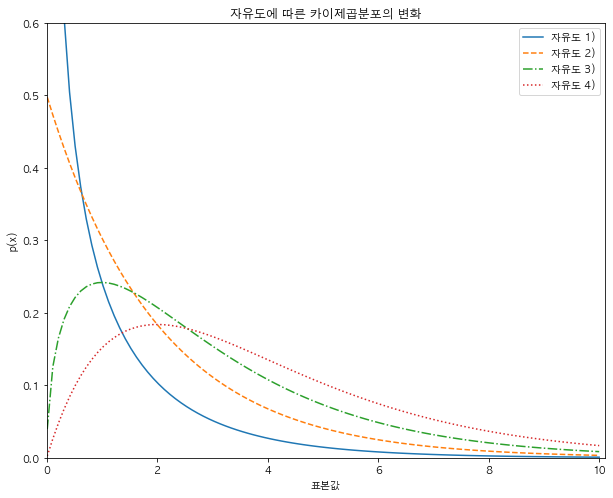

In [33]:
plt.subplots(figsize=(10,8))
xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for df, ls in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=("자유도 %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이제곱분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

## 9.1 확률분포의 추정

> **데이터 분석의 첫 번째 가정은 "분석하고자 하는 데이터는 어떤 확률변수로부터 실현된 표본"이라는 것이다.** 따라서 우리의 관심이 있는 곳은 지금 갖고 있는 데이터, 즉 하나의 실현체에 불과한 표본이 아니라 그 뒤에서 이 데이터를 만들어내는 확률변수의 분포다.

- 확률분포를 알아내는 일은 다음 두 가지 작업으로 나뉜다.
    1. 확률변수가 어떤 확률분포를 따르는지 알아낸다.
    2. 데이터로부터 해당 확률분포의 모수의 값을 구한다.

> 첫 번째 작업 즉, 확률변수가 어떤 확률분포를 따르는가는 데이터가 생성되는 원리를 알거나 데이터의 특성을 알면 추측할 수 있다. 히스토그램을 그려서 확률분포의 모양을 살펴보고 힌트를 얻을 수도 있다.

* 데이터는 0 또는 1 뿐이다. $\rightarrow$ 베르누이분포
* 데이터는 카테고리 값이어야 한다. $\rightarrow$ 카테고리분포
* 데이터는 0과 1 사이의 실수 값이어야 한다. $\rightarrow$ 베타분포
* 데이터는 항상 0 또는 양수이어야 한다. $\rightarrow$ 로그정규분포, 감마분포, F분포, 카이제곱분포, 지수분포, 하프코시분포 등
* 데이터가 크기 제한이 없는 실수다. $\rightarrow$ 정규분포 또는 스튜던트 t분포, 코시분포, 라플라스분포 등

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

## 9.4 검정과 유의확률

> 검정은 데이터 뒤에 숨어있는 확률변수의 분포에 대한 가설이 맞는지 틀리는지 증명하는 작업이다. 예를 들어 "어떤 동전을 15번 던졌더니 12번 앞면이 나왔다. 이 동전은 조작되지 않은 공정한 동전이라고 할 수 있는가?"

- 데이터를 특정한 확률분포를 가진 확률변수로 모형화하면 모수를 추정할 수 있다. 다음 작업으로는 데이터 뒤에 숨어있는 확률변수가 정말로 그 모숫값을 가졌는지 검증해보아야 한다. 다른 말로 하면 해당 확률변수가 그 모숫값을 가졌다는 주장을 논리적으로 증명해야 한다.
- 확률분포에 대한 어떤 주장을 '가설'이라고 하며, 이 가설을 증명하는 행위를 '통계적 가설검정'이라고 한다.
    - 특히 확률분포의 모숫값이 특정한 값을 가진다는 가설을 검정하는 것을 '모수 검정'이라고 한다.

### 검정통계량
- 귀무가설이 맞거나 틀렸다는 것을 증명하려면 어떤 증거가 있어야 한다.
    - 예를 들어.. '어떤 병에 걸렸다'라는 가설을 증명하려면 환자의 혈액을 채취하여 혈액 내의 특정한 성분의 수치를 측정해야 한다고 가정하자. 이때 해당 수치가 바로 검정통계량이다.
    - 가설에 대한 증거가 되는 숫자가 검정통계량이다.
- **검정통계량은 표본 데이터 집합을 입력으로 계산되는 합수의 값이다.**
- 

In [36]:
xx = np.linspace(-3, 3, 100)

In [64]:
stats.norm().rvs(size=10)

array([-0.60383955, -1.14955406,  1.09830354, -0.13783918,  0.0253856 ,
        0.61039176,  0.28601253,  0.9785673 , -1.10947755, -0.5475181 ])

In [ ]:
stats.norm().

In [63]:
a = stats.norm().pdf(xx)

In [60]:
b = np.power(stats.norm().pdf(xx), 2)

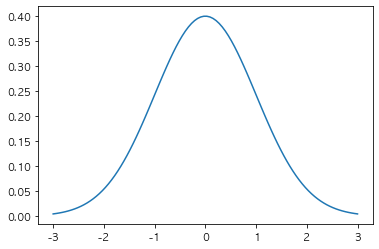

In [59]:
plt.plot(xx ,a)

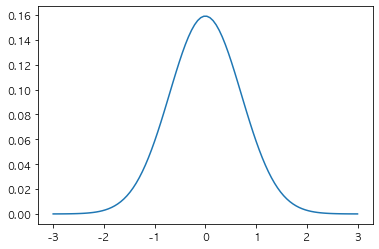

In [61]:
plt.plot(xx, b)

4) 마지막으로, X가 χ²(n1) 분포를 하고, Y가 χ²(n2)의 분포를 할 경우, X와 Y가 확률적으로 서로 독립이라면, X+Y는 χ²(n1+n2)가 된다. 이를 'χ² 분포의 가법성'이라고 한다.

- 왜 카이제곱분포가 필요한가?
    - 

- T-test는 독립변수가 하나이고 표본이 2개일 때 한정해서 사용한다. 예) 특정 디자인을 만들고 이 디자인을 사용한 그룹의 만족도가 사용하지 않은 그룹의 만족도보다 높을 것인가?
- 근데.. 디자인 A, B, C를 만들고 비교하려면.. t-test를 반복적으로 시행해야돼서 1종오류를 범할 리스크가 높아진다.

- ANOVA(One-way)는 독립변수가 하나, 측정 집단이 3개 이상일 때 사용한다.
- 사용 조건은..
    - 관측치가 정규분포를 따라야 한다.
    - 구형성(등분산 가정)을 만족해야 한다.
        - 등분산 가정은 일반적으로 관측치(샘플수)가 똑같은 경우에는 크게 문제가 되지 않는다.
        - 샘플 수가 다른 경우 가장 큰 분산이 가장 작은 분산보다 1.5배 이상 크지 않으면 괜찮다.
    - 표본이 독립적이어야 한다.

- ANOVA는 세 가지 이상 집단의 평균이 차이가 있는지 없는지 밖에 검증하지 못한다.
    - 평균 차이가 어떻게 있는지 등을 확인하려면 post-hoc(후속검정)이 필요하다.

카이제곱분포, t분포, f분포들은 일반적으로 "표본의 분포"라고 한다.
> **정규모집단으로부터 표본을 추출했을 때 그 표본들의 평균, 분산에 대한 분포로 표본들로부터 모집단의 모수에 대한 가설검정을 실시할 때 사용된다**
> - 모집단이 정규모집단이 아니더라도, 중심극한정리에 의해 통계량의 분포는 정규분포를 가정할 수 있다.

카이제곱분포는 '표준정규분포를 따르는 변수의 제곱합에 대한 분포'다.
- 몇 개의 Z^2을 합했느냐에 따라 카이제곱분포의 모수인 '자유도'가 결정된다.
- 카이제곱분포는 정규분포를 따르는 변수의 분산에 대한 신뢰구간을 구할 때 이용된다.

t분포는 '표준정규분포를 따르는 변수와 카이제곱분포를 따르는 변수의 비율의 형태'로 표현된다.
- t분포는 정규분포를 따르는 집단의 평균에 대한 가설검정 또는 정규분포를 따르는 두 집단의 평균차이검정을 할 때 이용된다.
- 모분산을 알고 있으면 z분포로 가설검정하고, 모르면 t분포로 한다.

F분포는 '서로 다른 카이제곱 분포의 비율의 형태'로 표현된다.
- F분포는 정규분포를 따르는 두 집단의 분산에 대한 가설검정을 할 때 이용된다.

평균을 기준으로 각 데이터가 흩어져 있는 정도를 나타내는 대표적인 척도가 '분산'인데, '분산의 특징을 확률분포로 만든 것'이 카이제곱분포다.
- 카이제곱분포의 모양을 보면 0의 오른쪽 부분에 분포가 많고, 0에서 멀어질수록 분포가 감소한다 ==> 일반적으로 데이터의 치우침이 매우 큰 경우가 별로 없기 때문이다.
- **카이제곱분포의 특징이 곧 분산의 특징이다.**

In [ ]:
from IPython.display import Image

In [ ]:
Image(filename='/Users/jihun/Documents/data_science/notebooks/pos_stats/image/1.png', width=500)

- 카이제곱분포도 t분포와 마찬가지로, 직접 확률을 구할 때 사용하는 분포가 아니라 '신뢰구간'이나 '가설검정' 등 여러 분석에서 사용하는 분포다.

## 3.6 t분포, 카이제곱분포, F분포
- 모두 정규분포에서 파생된 분포이다.
    - 정규분포에서 생성된 표본 데이터 집합에 여러 수식을 적용하여 값을 변화시키면 데이터 집합의 분포 모양이 달라지는데, 적용된 수식에 따라 t분포/카이제곱분포/F분포가 된다.
    - 이 분포들은 '통계량 분포'라고도 불린다. => 나중에 가설 검정에 쓰인다.

t분포는 양 끝단이 더 두텁다 => 정규분포라 가정했을 때보다 극단적인 현상이 더 자주 발생한다. "Fat Tail 현상"

In [ ]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

plt.ylabel("날짜")
plt.ylabel("주가 수익률")
plt.show()

데이터에서 각 지수간 일간 수익률을 구해서 히스토그램 만들면 정규분포와 비슷하다

In [ ]:
import numpy as np
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

하지만 qq plot을 보면 정규분포보다 극단적인 경우가 많은 것을 알 수 있다.

In [ ]:
import scipy as sp
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

위와 같은 데이터 모형에 적합한 것이 t분포다.
